   #### Our group's topic is to process the data about urban forests. The project  mainly  focus on an area which is called "LA GOCCIA",  it located in an abandoned post-industrial estate that has been spontaneously rewilded. We got a lot of csv files, they include the type, number, and environmental impact of trees, etc. I am responsible for processing the data about the LAGOCCIA area, and for processing the basic data of other cities, and compare the two to see if I can speculate some conclusions from it.                        I got the data which I should process from some csv files and report and organized them into two new files. Specially that we have received two reports in total, and I chose the one with the earlier date for data extraction and processing.
   
   

In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load the data  

In [358]:
data2 = pd.read_csv("datanew.csv")
data3 = pd.read_csv("data3new.csv")
data2.columns = pd.Series(data2.columns).str.replace("\n"," ").values
data3.columns = pd.Series(data3.columns).str.replace("\n"," ").values
other_information = data2[["City","% Tree Cover","Number of Trees","Carbon Sequestration (metric tons/yr)","Pollution Removal (metric tons/yr)"]]
# Merge and connect two data
data = pd.merge(data3,other_information,on="City")

#### Descriptive analysis

In [359]:
# show the data
data.head()

City  Number of Trees/ha  Carbon Storage  (metric tons)/ha  \
0  Toronto, ON, Canada               160.4                              17.4   
1          Atlanta, GA               275.8                              35.7   
2      Los Angeles, CA                48.4                               9.4   
3         New York, NY                65.2                              15.3   
4   London, ON, Canada               185.5                              15.3   

   Carbon Sequestration (metric tons/ha/yr)  Pollution Removal kg/ha/yr  \
0                                      0.73                        29.9   
1                                      1.23                        44.2   
2                                      0.36                        14.7   
3                                      0.48                        19.0   
4                                      0.53                        15.7   

   % Tree Cover Number of Trees Carbon Sequestration (metric tons/yr)  \
0          26.6      10,220,000                                46,700   
1          36.7       9,415,000                                42,100   
2          11.1       5,993,000                                69,800   
3          20.9       5,212,000                                38,400   
4          24.7       4,376,000                                12,500   

  Pollution Removal (metric tons/yr)  
0                              1,905  
1                              1,509  
2                              1,792  
3                              1,521  
4                                370

In [371]:
# the size of data
data.shape

(24, 9)

In [361]:
# Check for missing values
data.isna().sum()

City                                        0
Number of Trees/ha                          0
Carbon Storage  (metric tons)/ha            1
Carbon Sequestration (metric tons/ha/yr)    1
Pollution Removal kg/ha/yr                  1
% Tree Cover                                0
Number of Trees                             0
Carbon Sequestration (metric tons/yr)       0
Pollution Removal (metric tons/yr)          0
dtype: int64

In [362]:
# Check for duplicated values
data.duplicated().sum()

0

In [363]:
# show the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   City                                      24 non-null     object 
 1   Number of Trees/ha                        24 non-null     float64
 2   Carbon Storage  (metric tons)/ha          23 non-null     float64
 3   Carbon Sequestration (metric tons/ha/yr)  23 non-null     float64
 4   Pollution Removal kg/ha/yr                23 non-null     float64
 5   % Tree Cover                              24 non-null     float64
 6   Number of Trees                           24 non-null     object 
 7   Carbon Sequestration (metric tons/yr)     24 non-null     object 
 8   Pollution Removal (metric tons/yr)        24 non-null     object 
dtypes: float64(5), object(4)
memory usage: 1.9+ KB


In [364]:
# Descriptive statistics of data
data.describe()

Number of Trees/ha  Carbon Storage  (metric tons)/ha  \
count           24.000000                         23.000000   
mean           136.691667                         18.978261   
std            130.779037                         10.185728   
min             22.500000                          2.900000   
25%             58.850000                         12.150000   
50%            106.550000                         15.300000   
75%            165.150000                         26.450000   
max            645.000000                         37.700000   

       Carbon Sequestration (metric tons/ha/yr)  Pollution Removal kg/ha/yr  \
count                                 23.000000                   23.000000   
mean                                   0.633478                   19.004348   
std                                    0.298216                   10.470282   
min                                    0.200000                    5.100000   
25%                                    0.385000                   11.950000   
50%                                    0.610000                   15.700000   
75%                                    0.850000                   25.950000   
max                                    1.230000                   44.200000   

       % Tree Cover  
count     24.000000  
mean      23.637500  
std       10.235565  
min        8.900000  
25%       15.350000  
50%       25.300000  
75%       28.725000  
max       51.200000

In [365]:
# Category distribution of category data
data["City"].value_counts()

Toronto, ON, Canada      1
Atlanta, GA              1
Freehold, NJ             1
Casper, WY               1
Jersey City, NJ          1
Hartford, CT             1
Moorestown, NJ           1
Morgantown, WV           1
San Francisco, CA        1
Minneapolis, MN          1
Woodbridge, NJ           1
Syracuse, NY             1
Boston, MA               1
Albuquerque, NM          1
Oakville, ON , Canada    1
Washington, DC           1
Philadelphia, PA         1
Baltimore, MD            1
Phoenix, AZ              1
Chicago, IL              1
London, ON, Canada       1
New York, NY             1
Los Angeles, CA          1
La Goccia                1
Name: City, dtype: int64

As can be seen from the above description, the data set is a small data set of table type, with 24 rows and 9 columns, including both numerical data and object data; Secondly, the data has a small number of missing values, but there are no abnormal values and duplicate values, which is more standardized;

#### Exploratory analysis

It can be seen from the following two graphics that the area of ​​La Goccia has much higher tree coverage than other cities, and the average number of trees per hectare is also much higher than that of other cities, which proves that its rewildization is very good.

<AxesSubplot:xlabel='City', ylabel='% Tree Cover'>

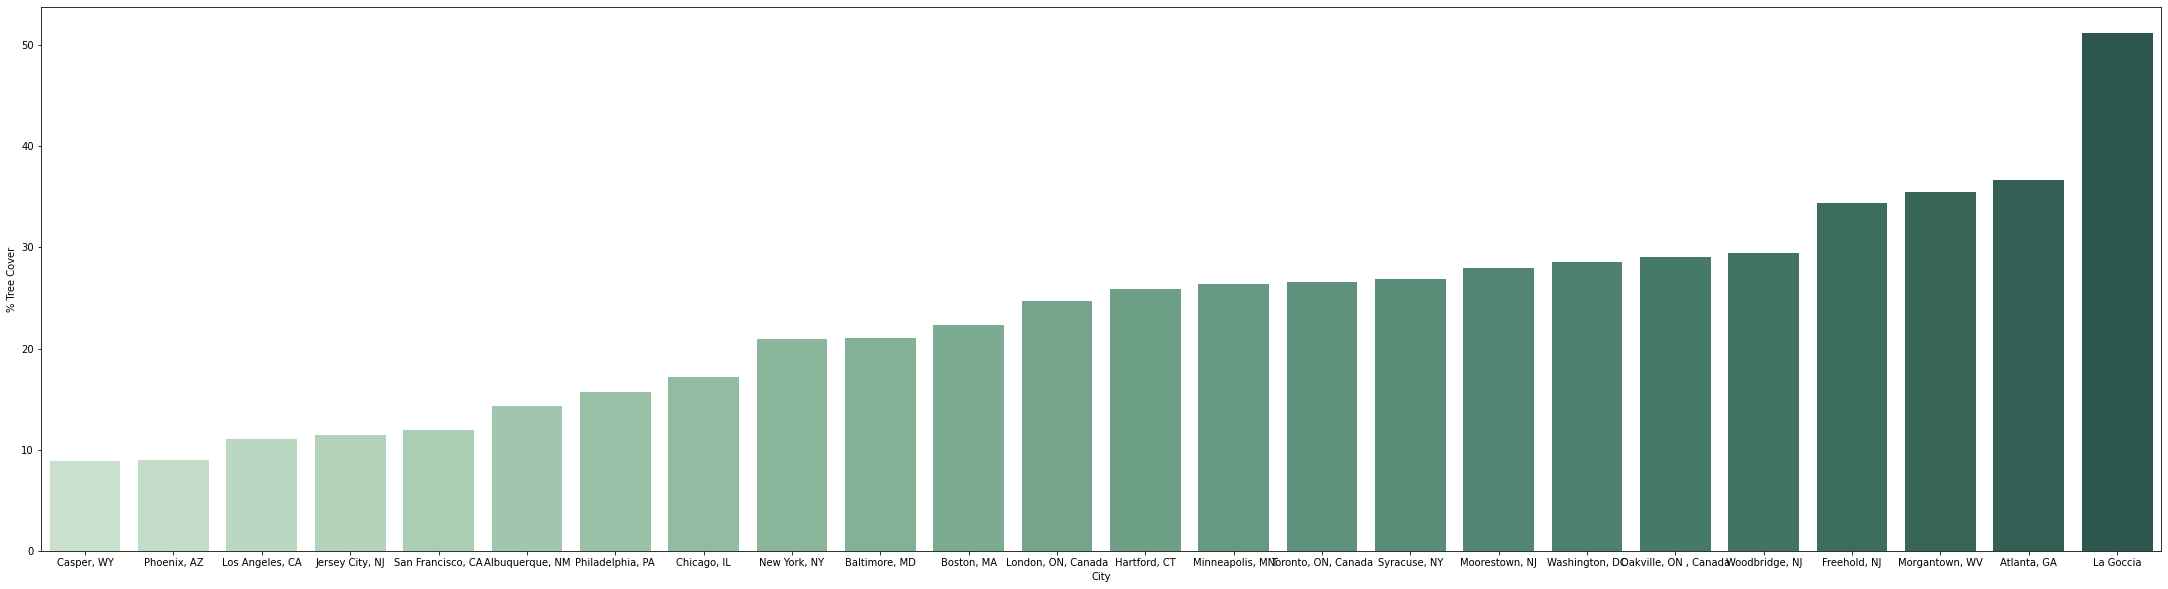

In [368]:
data2 = data.sort_values("% Tree Cover")
fig = plt.figure(figsize=(38,10))
sns.barplot(x = "City", y= "% Tree Cover",data=data2,palette="ch:2.5,-.2,dark=.3")


<AxesSubplot:xlabel='City', ylabel='Number of Trees/ha'>

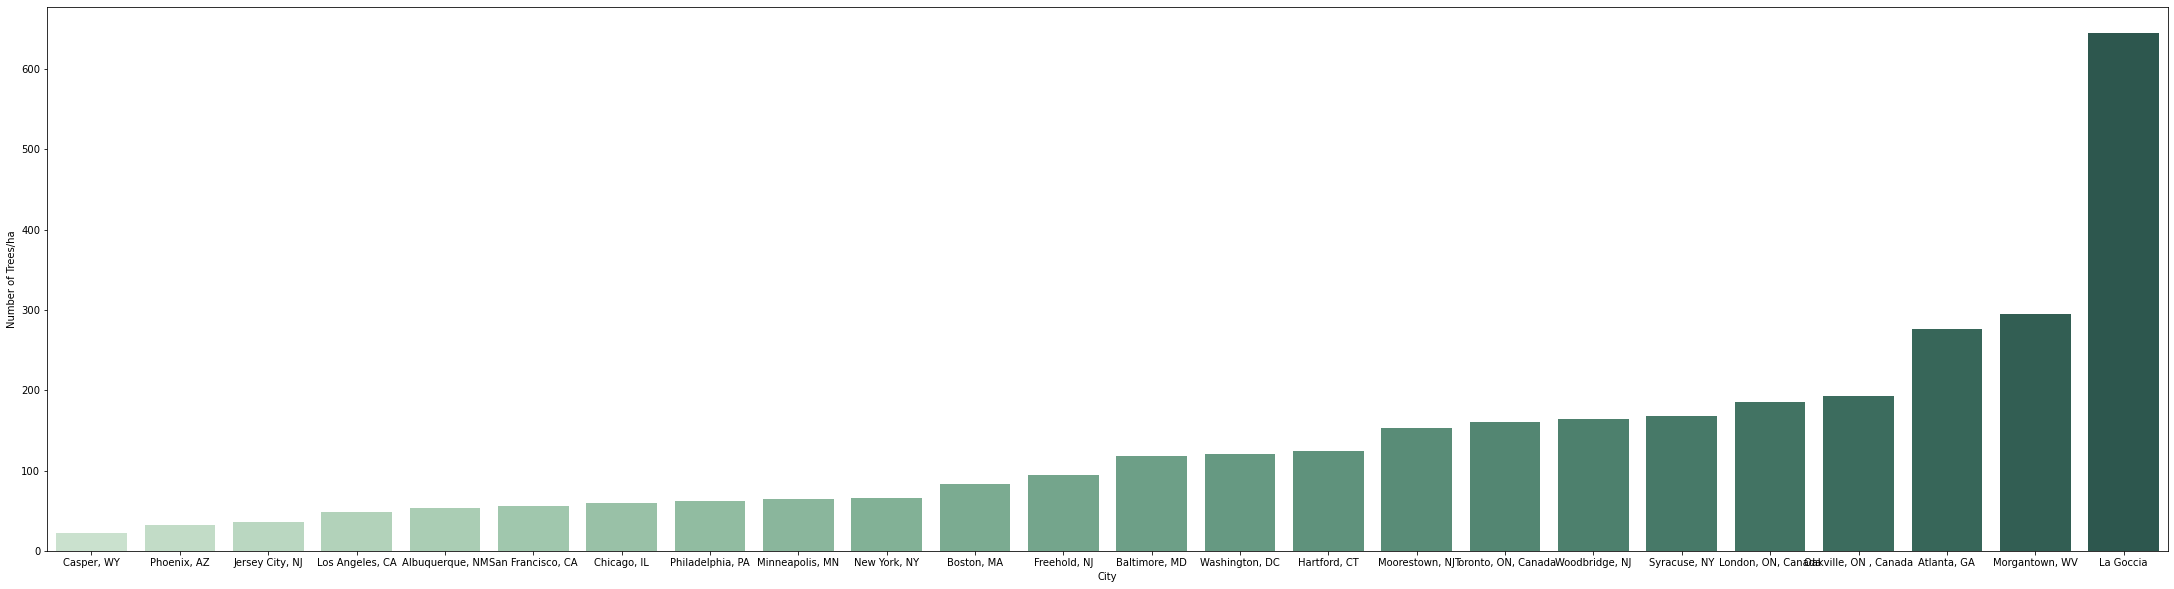

In [369]:
data2 = data.sort_values("Number of Trees/ha")
fig = plt.figure(figsize=(38,10))
sns.barplot(x = "City", y= "Number of Trees/ha",data=data2,palette="ch:2.5,-.2,dark=.3")

It can be seen from the following two graphics that the distribution of trees per hectare is skewed, which invades to the left and is more distributed in the range of 50 to 100,but the LAGOCCIA area had reached 600 trees/ha.

And the distribution of carbon storage (metric tons) / HA is normal, but not standard.

We can speculate some countries don’t have many trees, but they use other methods such as improving soil quality to increase carbon storage.

Text(0.5, 1.0, 'The distribute of Carbon Storage  (metric tons)/ha')

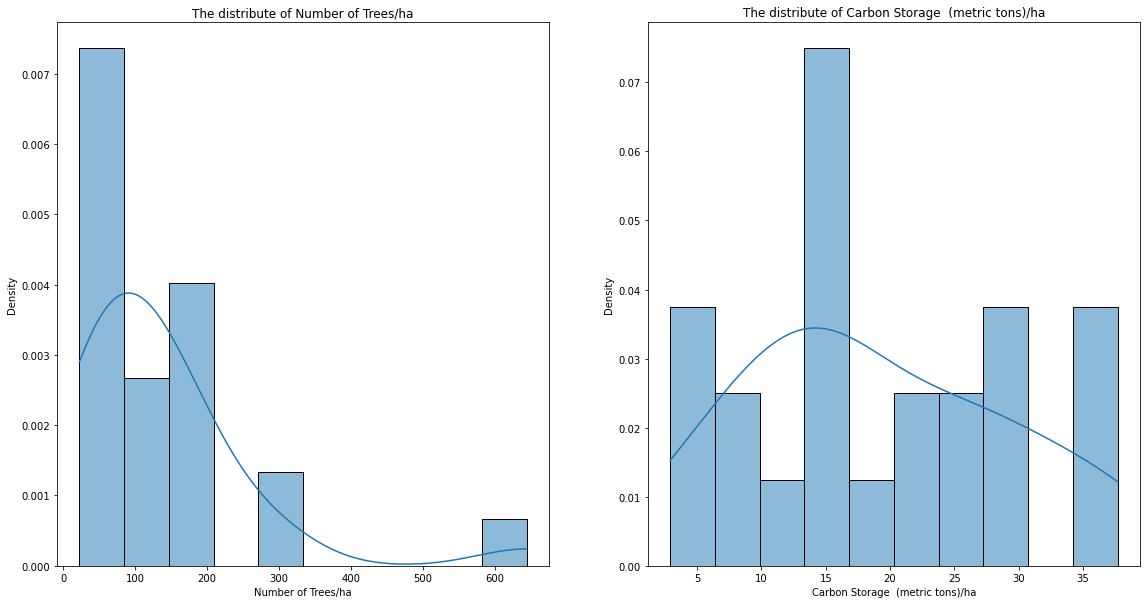

In [353]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 3,1)
sns.histplot(data["Number of Trees/ha"],stat="density",bins=10,kde=True)
plt.title("The distribute of Number of Trees/ha")
plt.subplot(1, 3, 2)
sns.histplot(data["Carbon Storage  (metric tons)/ha"],stat="density",bins=10,kde=True)
plt.title("The distribute of Carbon Storage  (metric tons)/ha")

It can be seen that the pollution control is within a reasonable range，but there is a tendency to continue to deteriorate, because it can be seen that there are far more cities with weak pollution control capabilities than cities with strong pollution control capabilities.

Text(0.5, 1.0, 'The distribution range of Pollution Removal kg/ha/yr')

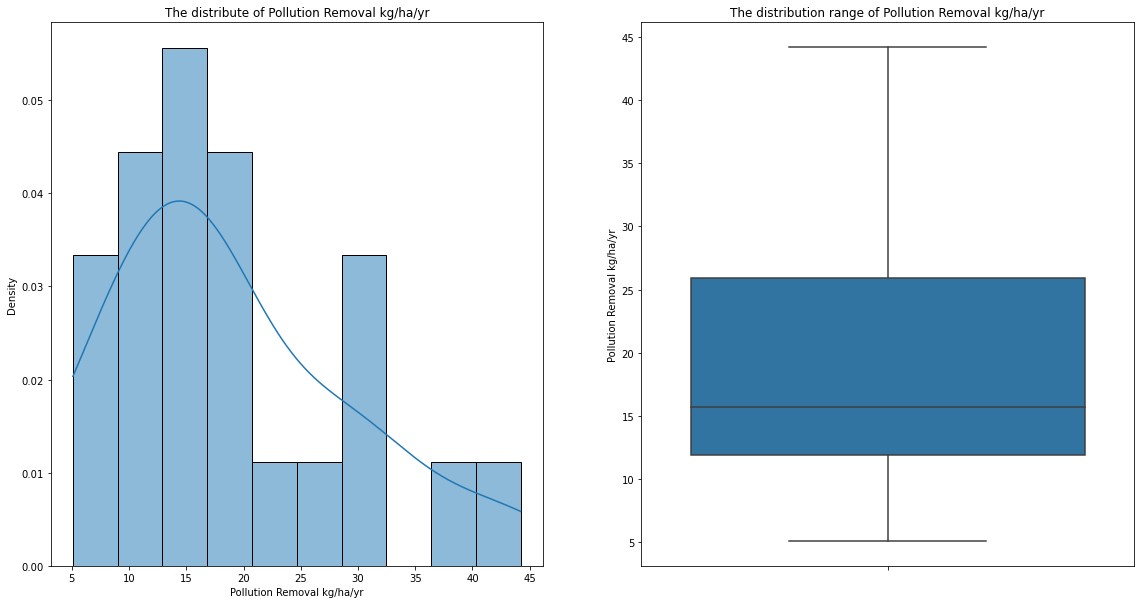

In [370]:
plt.figure(figsize=(30,10))
plt.subplot(1, 3, 1)
sns.histplot(data["Pollution Removal kg/ha/yr"],stat="density",bins=10,kde=True)
plt.title("The distribute of Pollution Removal kg/ha/yr")
plt.subplot(1, 3, 2)
sns.boxplot(y=data["Pollution Removal kg/ha/yr"])
plt.title("The distribution range of Pollution Removal kg/ha/yr")


Carbon storage, carbon sequestration and tree coverage showed an obvious positive correlation, which increased with the increase of. Tree coverage will greatly affect carbon storage and carbon sequestration.

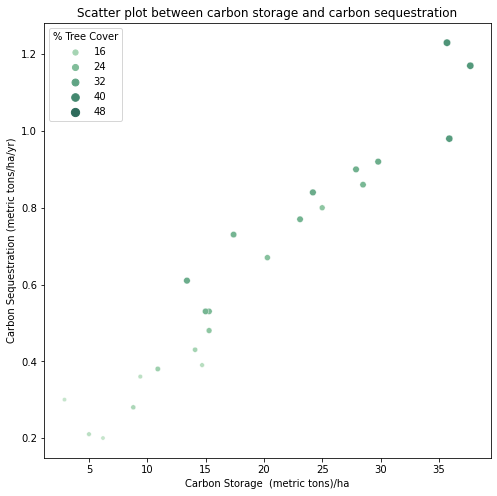

In [344]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=data["Carbon Storage  (metric tons)/ha"],y=data["Carbon Sequestration (metric tons/ha/yr)"],size=data["% Tree Cover"],hue=data["% Tree Cover"],palette="ch:2.5,-.2,dark=.3")
plt.title("Scatter plot between carbon storage and carbon sequestration")
plt.show()

Finally, we draw the thermodynamic diagram of the correlation of each variable in the data. It can be seen that the correlation is generally high. 

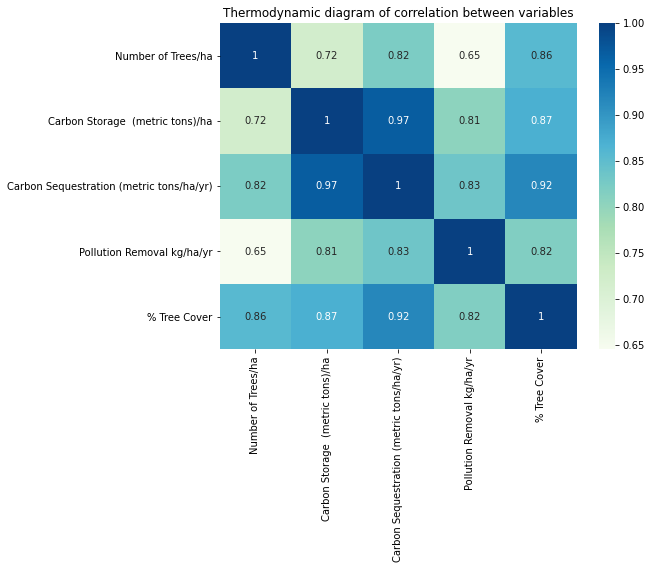

In [367]:
data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap = "GnBu",annot=True)
plt.title("Thermodynamic diagram of correlation between variables")
plt.show()

#### Reflect and Hypothesise:

The dataset we use has 24 rows and 9 columns, which is a small table type dataset; There are some missing values in the data, but there are no outliers and duplicate values; Most of the data show skew distribution, non-standard normal distribution, but the skewness is small. It can be seen that there is still big room for improvement in the greening level of most cities. In analyzing the relationship between the data, we found that there is a high correlation between the data, and the correlation is generally between 0.7 and 0.9, such as carbon storage (metric tons) / HA and carbon sequence (metric tons / HA / yr) 	 The correlation between them is as high as 0.96, so it belongs to the data set with high linear correlation.The correlation is easy to judge. For example `Scatter plot between carbon storage and carbon sequestration`和`Thermodynamic diagram of correlation between variables`and other charts can let us clearly see the correlation between them.However, causality cannot be specifically analyzed by data, but can only be judged and analyzed by logical relationship. For example, the increase of number coverage is the reason for the increase of carbon sequestration number, and the latter is the result of the former, which can only be judged by logical relationship.

As a re-wildized city, the La Goccia area has much better greening than the cities in comparison. Ironically, this area is just a factory abandoned by people. It can be seen that without human intervention, the natural environment will improve itself.

> hypothesis1

First, I want to ask the data host for the total hectares of this area, so that I can calculate the average value of each data and analyze it more accurately. Perhaps in future investigations, we can find more areas and conduct controlled variable tests to find out which is the biggest factor affecting the wildization of the environment. Then we need to find out what is the biggest influencing factor between a well-greened city and a badly-greened city. Compare these factors and find out which ones can be transplanted and learned.

> hypothesis2

According to the barchart of the number of trees, we can know the total number of trees in some cities is very high, but the average value is in the middle. It may be because the area is too large, which increases its total value,but it does not mean that the country has a good environmental protection system.

> hypothesis3

Maybe we can combine the analysis of my teammates or ask the datahost for a newest report to find the tree with the highest oxygen release in this area and cultivate them in other cities.


> hypothesis4

Did only plants play an important role in the re-wildization of the La Goccia area? Maybe we should investigate whether there are animals in that area and analyze their role.